# Email Spam Detection

In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
emails = pd.read_csv('messages.csv')
emails.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [3]:
emails.shape

(2893, 3)

In [4]:
print ('Regular(0) and Spam(1) counts','\n',emails.label.value_counts())

Regular(0) and Spam(1) counts 
 0    2412
1     481
Name: label, dtype: int64


In [5]:
#Ratio
print ('spam ratio = ', round(len(emails[emails['label']==1]) / len(emails.label),2)*100,'%')
print ('ham ratio  = ', round(len(emails[emails['label']==0]) / len(emails.label),2)*100,'%')

spam ratio =  17.0 %
ham ratio  =  83.0 %


In [6]:
#New column for Length of message
emails['subject_length'] = emails.subject.str.len()
emails['message_length'] = emails.message.str.len()
emails.head(5)

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  subject_length  \
0  content - length : 3386 apple-iss research cen...      0            39.0   
1  lang classification grimes , joseph e . and ba...      0             NaN   
2  i am posting this inquiry for sergei atamas ( ...      0            50.0   
3  a colleague and i are researching the differin...      0             4.0   
4  earlier this morning i was on the phone with a...      0            24.0   

   message_length  
0            2856  
1            1800  
2            1435  
3             324  
4            1046

# 1.  Data Preparation

In [7]:
# Convert all messages to lower case
emails['subject'] = emails['subject'].str.lower()
emails['message'] = emails['message'].str.lower()

In [8]:
emails.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  subject_length  \
0  content - length : 3386 apple-iss research cen...      0            39.0   
1  lang classification grimes , joseph e . and ba...      0             NaN   
2  i am posting this inquiry for sergei atamas ( ...      0            50.0   
3  a colleague and i are researching the differin...      0             4.0   
4  earlier this morning i was on the phone with a...      0            24.0   

   message_length  
0            2856  
1            1800  
2            1435  
3             324  
4            1046

In [9]:
# Drop all rows containing NaN
strings=emails.dropna()

In [10]:
# Replace unwanted segments in the strings of the subject column
# Replace email addresses with 'email'
strings['subject'] = strings['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
strings['subject'] = strings['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
strings['subject'] = strings['subject'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
strings['subject'] = strings['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replace numbers with 'numbr'
strings['subject'] = strings['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [11]:
# Replace unwanted segments in the strings of the message column
# Replace email addresses with 'email'
strings['message'] = strings['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
strings['message'] = strings['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
strings['message'] = strings['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
strings['message'] = strings['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replace numbers with 'numbr'
strings['message'] = strings['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [12]:
strings.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  subject_length  \
0  content - length : numbr apple-iss research ce...      0            39.0   
2  i am posting this inquiry for sergei atamas ( ...      0            50.0   
3  a colleague and i are researching the differin...      0             4.0   
4  earlier this morning i was on the phone with a...      0            24.0   
5  content - length : numbr call for papers is th...      0            51.0   

   message_length  
0            2856  
2            1435  
3             324  
4            1046  
5            4492

In [13]:
# Remove punctuation from subject column
# Remove punctuation
strings['subject'] = strings['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
strings['subject'] = strings['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
strings['subject'] = strings['subject'].str.replace(r'^\s+|\s+?$', '')

In [14]:
# Remove punctuation from messages column
# Remove punctuation
strings['message'] = strings['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
strings['message'] = strings['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
strings['message'] = strings['message'].str.replace(r'^\s+|\s+?$', '')

In [15]:
strings.head()

subject  \
0              job posting apple iss research center   
2   query letter frequencies for text identification   
3                                               risk   
4                           request book information   
5  call for abstracts optimality in syntactic theory   

                                             message  label  subject_length  \
0  content length numbr apple iss research center...      0            39.0   
2  i am posting this inquiry for sergei atamas sa...      0            50.0   
3  a colleague and i are researching the differin...      0             4.0   
4  earlier this morning i was on the phone with a...      0            24.0   
5  content length numbr call for papers is the be...      0            51.0   

   message_length  
0            2856  
2            1435  
3             324  
4            1046  
5            4492

# 2.  Building Word Dictionary

In [16]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

In [17]:
stop_words = set(stopwords.words('english'))

In [18]:
strings['subject'] = strings['subject'].apply(lambda y: ' '.join(
    term for term in y.split() if term not in stop_words))

In [19]:
strings['message'] = strings['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [20]:
# New columns (clean_lengths) after puncuations,stopwords removal
strings['subject_clean_length'] = strings.subject.str.len()
strings['message_clean_length'] = strings.message.str.len()
strings.head()

subject  \
0         job posting apple iss research center   
2  query letter frequencies text identification   
3                                          risk   
4                      request book information   
5    call abstracts optimality syntactic theory   

                                             message  label  subject_length  \
0  content length numbr apple iss research center...      0            39.0   
2  posting inquiry sergei atamas satamas umabnet ...      0            50.0   
3  colleague researching differing degrees risk p...      0             4.0   
4  earlier morning phone friend mine living south...      0            24.0   
5  content length numbr call papers best good eno...      0            51.0   

   message_length  subject_clean_length  message_clean_length  
0            2856                    37                  2179  
2            1435                    44                  1064  
3             324                     4                   210  
4            1046                    24                   629  
5            4492                    42                  3370

In [21]:
# Total length before and after removal
print ('Original Length of Subject column', strings.subject_length.sum())
print ('Clean Length of Subject column', strings.subject_clean_length.sum())
print ('Original Length of messages column', strings.message_length.sum())
print ('Clean Length of messages column', strings.message_clean_length.sum())

Original Length of Subject column 91663.0
Clean Length of Subject column 78357
Original Length of messages column 9186422
Clean Length of messages column 6646683


In [22]:
# Word count distribution BEFORE cleaning for subject column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(strings[strings['label']==1]['subject_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Length of Spam subject')
ax[0].legend()

sns.distplot(strings[strings['label']==0]['subject_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('Length of Regular subject')
ax[1].legend()

plt.show()

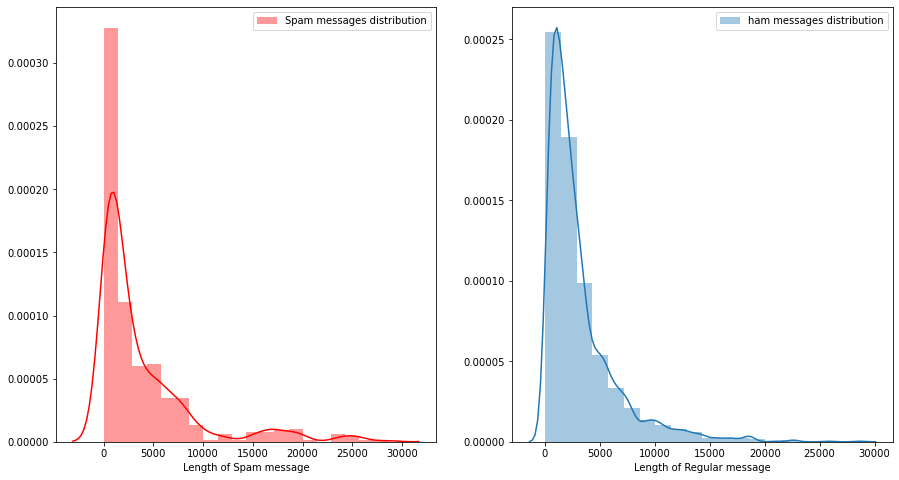

In [23]:
# Word count distribution BEFORE cleaning for message column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(strings[strings['label']==1]['message_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Length of Spam message')
ax[0].legend()

sns.distplot(strings[strings['label']==0]['message_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('Length of Regular message')
ax[1].legend()

plt.show()

# 3. Feature Extraction

In [24]:
#Getting a sense of loud words in spam for subject column
from wordcloud import WordCloud


spams = strings['subject'][strings['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
#Getting a sense of loud words in spam for message column
from wordcloud import WordCloud


spams = strings['message'][strings['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

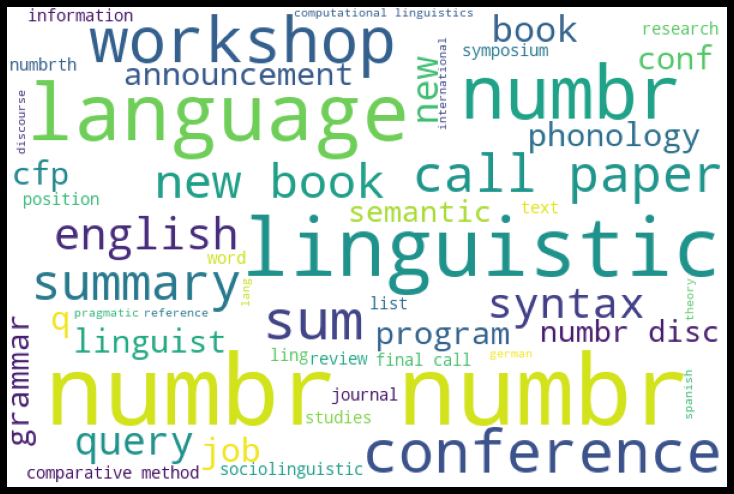

In [26]:
#Getting sense of loud words in regular emails for subject column 

regular = strings['subject'][strings['label']==0]
regular_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(regular))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(regular_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
#Getting sense of loud words in regular emails for message column 

regular = strings['message'][strings['label']==0]
regular_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(regular))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(regular_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 4. Training Classifiers

In [28]:
# Convert text into vectors using TF-IDF
# Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()

strings["complete_string"] = strings["subject"] + strings["message"]

x = tf_vec.fit_transform(strings["complete_string"])

y = strings['label']

In [29]:
# Train 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

# 5. Testing

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [32]:
KNN=KNeighborsClassifier(n_neighbors= 3)
LR=LogisticRegression(penalty='l2')
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
RF= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
AD= AdaBoostClassifier()#,n_estimators=50,Learning_rate=1.0)
MNB = MultinomialNB()

In [33]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('MultinomialNB',MNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(n_neighbors=3)



Accuracy score = 0.9703389830508474


cross validation score = 0.9653822226646096


roc_auc_score =  0.953435704816615


classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       584
           1       0.91      0.93      0.92       124

    accuracy                           0.97       708
   macro avg       0.95      0.95      0.95       708
weighted avg       0.97      0.97      0.97       708



[[572  12]
 [  9 115]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression()



Accuracy score = 0.9576271186440678


cross validation score = 0.9530172199273379


roc_auc_score =  0.8790322580645161


classification_report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97    

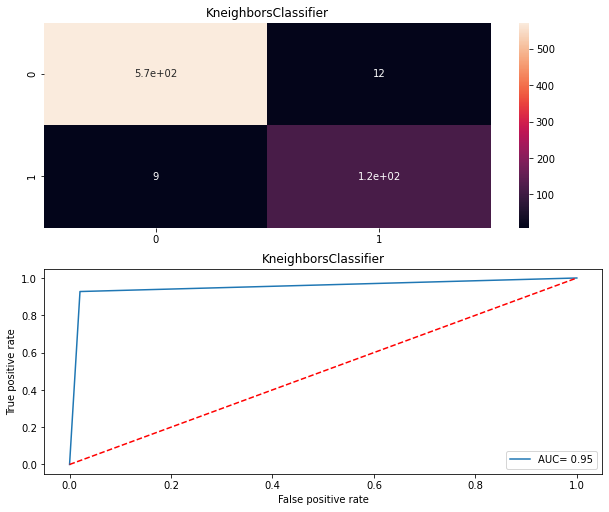

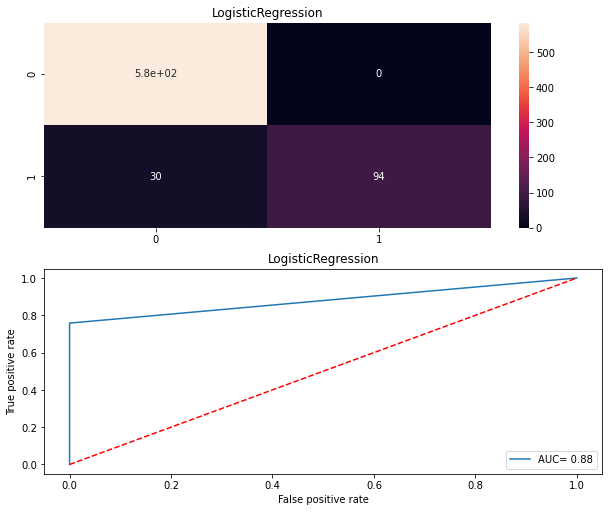

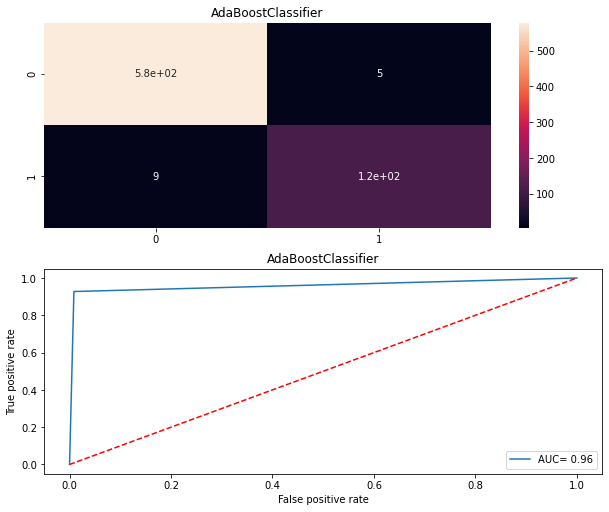

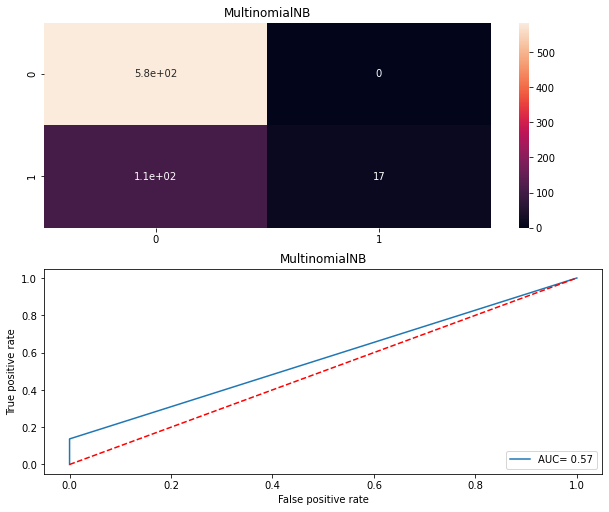

In [34]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [35]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_score
0    KneighborsClassifier       97.033898        96.538222      95.343570
1      LogisticRegression       95.762712        95.301722      87.903226
2  DecisionTreeClassifier       95.903955        96.820908      93.705811
3  RandomForestClassifier       97.457627        97.385906      92.741935
4      AdaBoostClassifier       98.022599        98.587070      95.942886
5           MultinomialNB       84.887006        86.047877      56.854839

# 6. Performance evaluation using multiple metrics

The best model is Adaboost so i choose it

In [36]:
AD.fit(x_train,y_train)
predAD=AD.predict(x_test)
print(accuracy_score(y_test,predAD))
print(confusion_matrix(y_test,predAD))
print(classification_report(y_test,predAD))

0.980225988700565
[[579   5]
 [  9 115]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       584
           1       0.96      0.93      0.94       124

    accuracy                           0.98       708
   macro avg       0.97      0.96      0.97       708
weighted avg       0.98      0.98      0.98       708



In [37]:
#save model as a pickle file
import joblib
joblib.dump(AD,'Spam.pkl')

['Spam.pkl']

In [38]:
# Load and use model to make a prediction
model=joblib.load('Spam.pkl')
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,